In [1]:
from datetime import datetime, date

import matplotlib.pyplot as plt
import numpy as np

import sklearn.linear_model
import sklearn.model_selection
import pandas as pd

import yfinance as yfin

In [2]:
start = datetime(2023, 1, 5)
start_btc = datetime(2023, 1, 5)
end = datetime.today()

df_aapl = yfin.download("AAPL", start, end)
df_fb = yfin.download("META", start, end)
df_gold = yfin.download("GLD", start, end)
df_btc = yfin.download("BTC-JPY", start_btc, end)
df_eth = yfin.download("ETH-JPY", start_btc, end)
# df_tesla = yfin.download("TSLA", start, end)
df_aapl.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-01-26,255.410004,256.559998,249.800003,251.479996,55969200
2026-01-27,258.269989,261.950012,258.209991,259.170013,49648300
2026-01-28,256.440002,258.859985,254.509995,257.649994,41288000
2026-01-29,258.279999,259.649994,254.410004,258.000000,67253000
2026-01-30,259.480011,261.899994,252.179993,255.169998,92352600


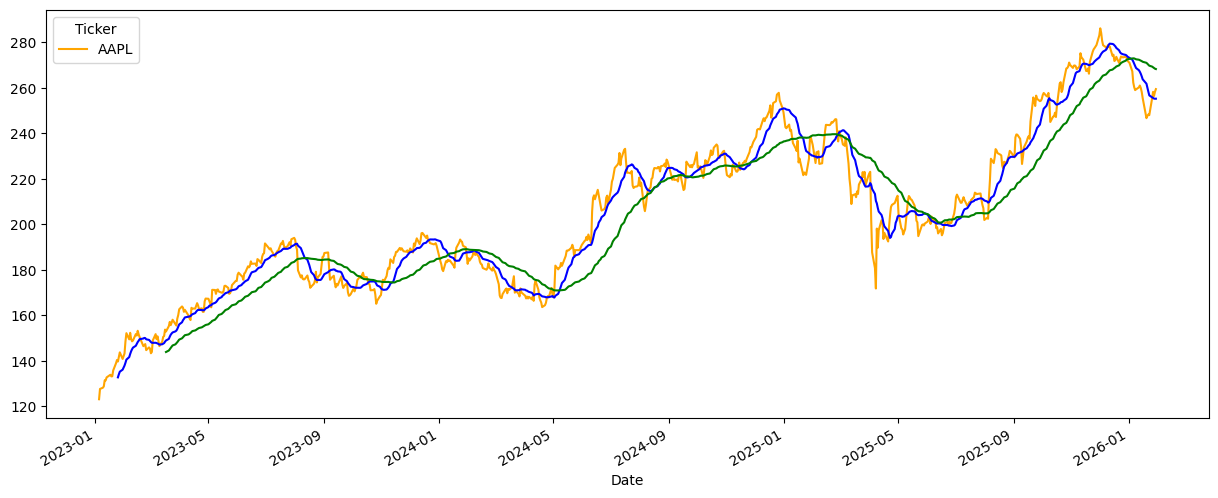

In [3]:
df_aapl['SMA'] = df_aapl['Close'].rolling(window=14).mean()
df_aapl['SMA50'] = df_aapl['Close'].rolling(window=50).mean()

df_aapl['Close'].plot(figsize=(15, 6), color='orange')
df_aapl['SMA'].plot(figsize=(15, 6), color='blue')
df_aapl['SMA50'].plot(figsize=(15, 6), color='green')
plt.show()

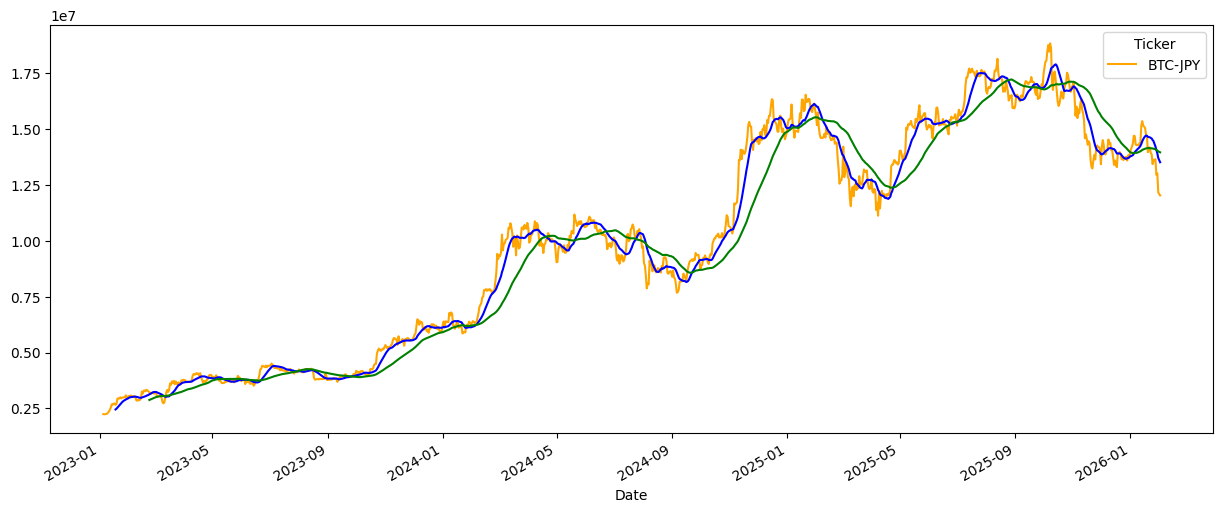

In [4]:
df_btc['SMA'] = df_btc['Close'].rolling(window=14).mean()
df_btc['SMA50'] = df_btc['Close'].rolling(window=50).mean()

df_btc['Close'].plot(figsize=(15, 6), color='orange')
df_btc['SMA'].plot(figsize=(15, 6), color='blue')
df_btc['SMA50'].plot(figsize=(15, 6), color='green')
plt.show()

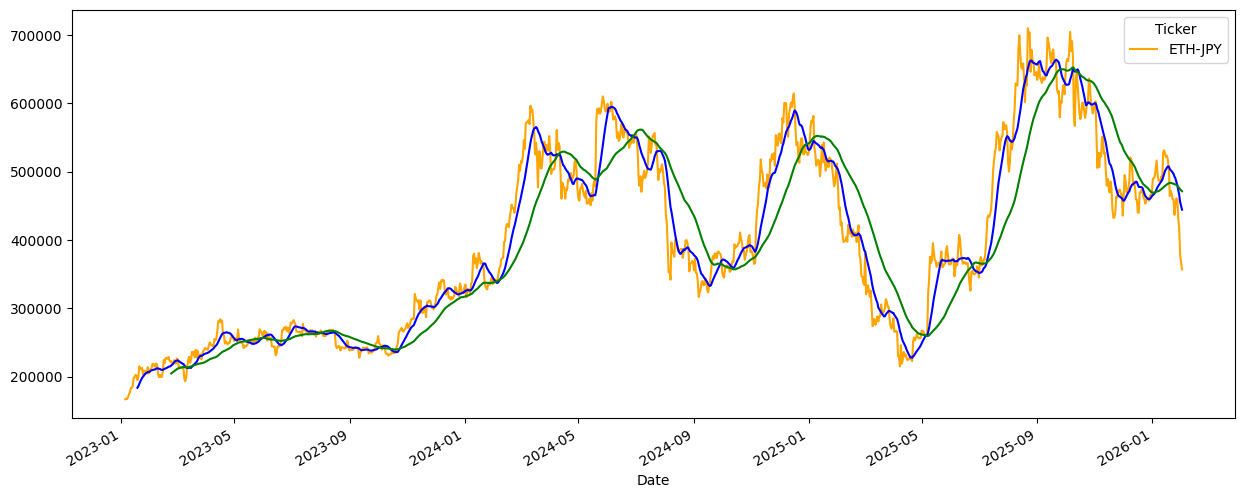

In [5]:
df_eth['SMA'] = df_eth['Close'].rolling(window=14).mean()
df_eth['SMA50'] = df_eth['Close'].rolling(window=50).mean()

df_eth['Close'].plot(figsize=(15, 6), color='orange')
df_eth['SMA'].plot(figsize=(15, 6), color='blue')
df_eth['SMA50'].plot(figsize=(15, 6), color='green')
plt.show()

In [6]:
df_aapl['change'] =(((df_aapl['Close'] - df_aapl['Open'])) / df_aapl['Open'] * 100)
df_fb['change'] =(((df_fb['Close'] - df_fb['Open'])) / df_fb['Open'] * 100)
df_gold['change'] =(((df_gold['Close'] - df_gold['Open'])) / df_gold['Open'] * 100)

df_aapl.tail(5).round(2)

Price,Close,High,Low,Open,Volume,SMA,SMA50,change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2026-01-26,255.41,256.56,249.80,251.48,55969200,255.87,269.37,1.56
2026-01-27,258.27,261.95,258.21,259.17,49648300,255.58,269.07,-0.35
2026-01-28,256.44,258.86,254.51,257.65,41288000,255.30,268.74,-0.47
2026-01-29,258.28,259.65,254.41,258.00,67253000,255.25,268.45,0.11
2026-01-30,259.48,261.90,252.18,255.17,92352600,255.26,268.30,1.69


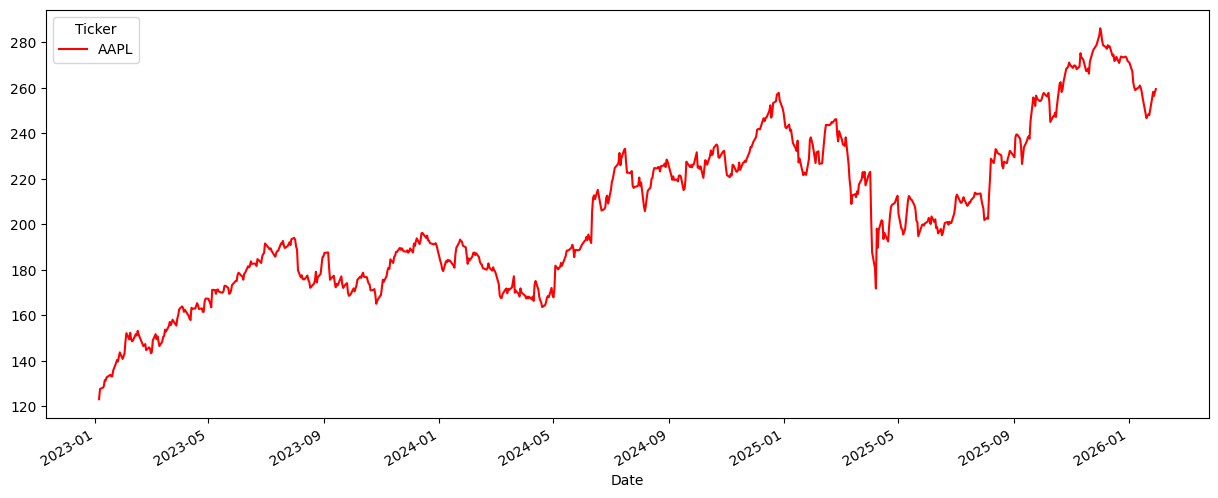

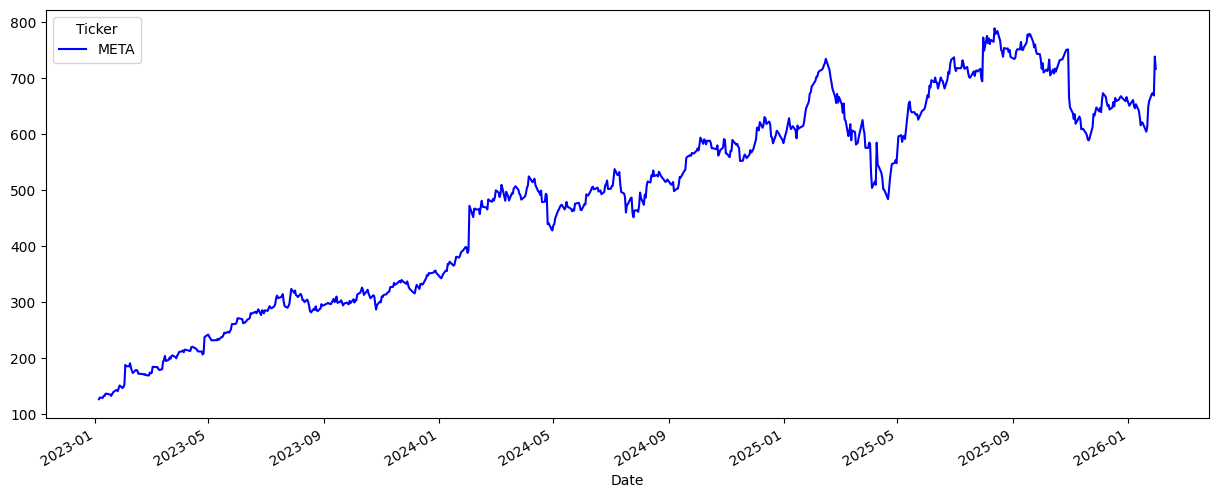

In [7]:
df_aapl['Close'].plot(figsize=(15, 6), color="red")
df_fb['Close'].plot(figsize=(15, 6), color="blue")
plt.show()

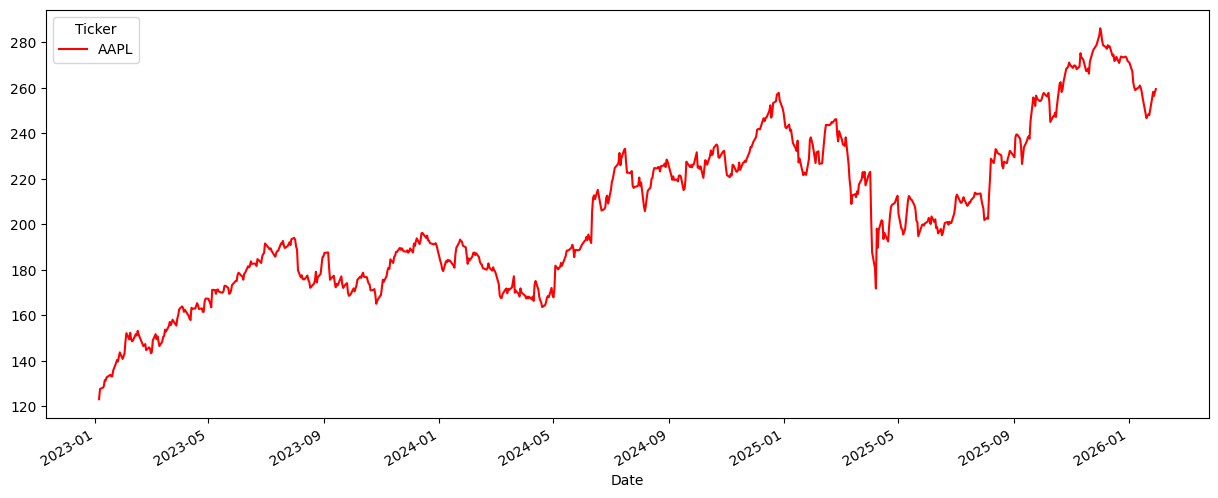

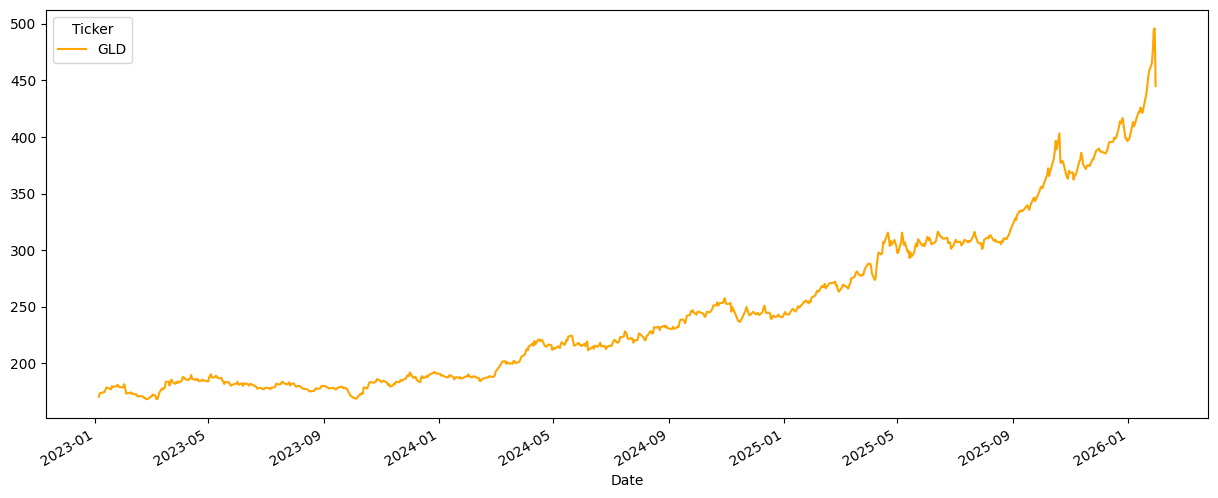

In [8]:
df_aapl['Close'].plot(figsize=(15, 6), color="red")
df_gold['Close'].plot(figsize=(15, 6), color="orange")
plt.show()

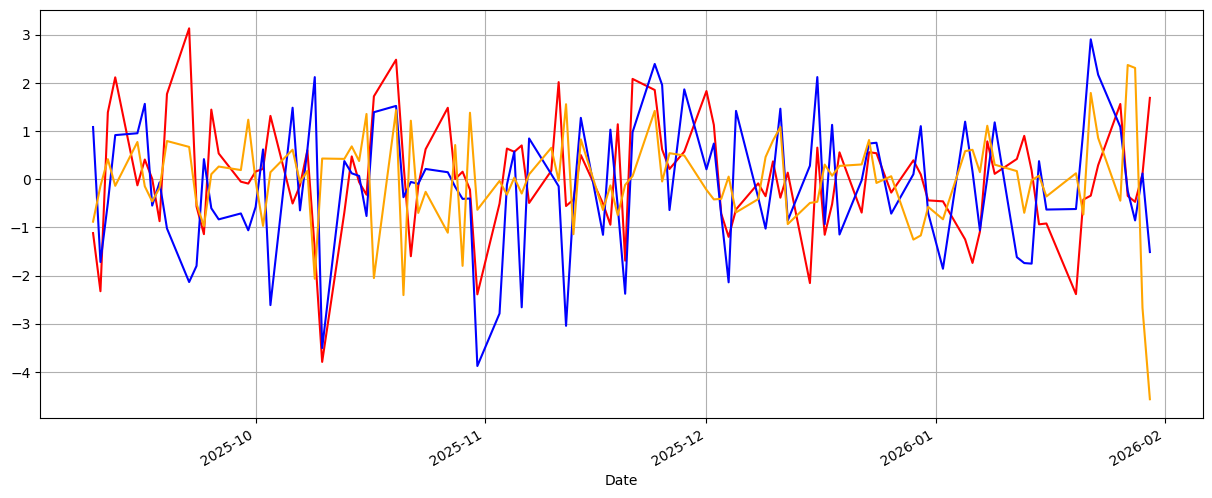

In [9]:
df_aapl['change'].tail(100).plot(grid=True, figsize=(15, 6), color="red")
df_fb['change'].tail(100).plot(grid=True, figsize=(15, 6), color="blue")
df_gold['change'].tail(100).plot(grid=True, figsize=(15, 6), color="orange")
plt.show()

In [10]:
df_aapl['label'] = df_aapl['Close'].shift(-30)
df_aapl.tail(35)

Price,Close,High,Low,Open,Volume,SMA,SMA50,change,label
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2025-12-10,278.779999,279.750000,276.440002,277.750000,33038300,278.128573,266.839431,0.370837,255.410004
2025-12-11,278.029999,279.589996,273.809998,279.100006,33248000,278.970001,267.295979,-0.383378,258.269989
2025-12-12,278.279999,279.220001,276.820007,277.899994,39532900,279.455002,267.723959,0.136742,256.440002
2025-12-15,274.109985,280.149994,272.839996,280.149994,50409100,279.325714,268.050757,-2.155991,258.279999
2025-12-16,274.609985,275.500000,271.790009,272.820007,37648600,279.157142,268.414128,0.656102,259.480011
2025-12-17,271.839996,276.160004,271.640015,275.010010,50138700,278.749285,268.726296,-1.152690,NaN
2025-12-18,272.190002,273.630005,266.950012,273.609985,51630700,278.273570,269.013894,-0.518981,NaN
2025-12-19,273.670013,274.600006,269.899994,272.149994,144632000,277.600000,269.411415,0.558523,NaN


In [11]:
X = np.array(df_aapl.drop(['label', 'SMA', 'SMA50'], axis=1))
X = sklearn.preprocessing.scale(X)
predict_data = X[-30:]
X = X[:-30]

In [12]:
y = np.array(df_aapl['label'])
y = y[:-30]
y

array([150.51225281, 146.49664307, 146.92086792, 147.40432739,
       144.7502594 , 145.94410706, 145.44093323, 143.36895752,
       143.9609375 , 149.01255798, 151.77514648, 149.57493591,
       150.82798767, 148.57843018, 146.5163269 , 148.46005249,
       150.55168152, 150.94638062, 153.76818848, 152.92953491,
       155.29751587, 157.15235901, 155.72174072, 156.80702209,
       158.10940552, 156.16571045, 155.54412842, 158.62243652,
       160.19122314, 162.69728088, 163.95031738, 163.4175415 ,
       161.57247925, 162.460495  , 159.86564636, 158.65205383,
       157.96141052, 163.34844971, 163.00315857, 163.02287292,
       164.24633789, 165.39080811, 164.42388916, 162.81568909,
       163.12153625, 161.5823822 , 161.57247925, 166.16043091,
       167.41342163, 167.32461548, 166.28865051, 165.2131958 ,
       163.57539368, 171.2514801 , 171.18241882, 169.47554016,
       171.24157715, 171.42907715, 170.50033569, 170.0063324 ,
       170.0063324 , 170.61891174, 172.95059204, 173.05

In [13]:
X_train, X_test, y_train, y_test = \
sklearn.model_selection.train_test_split(X, y, test_size=0.2)

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
accuracy

0.7748016960902021

In [14]:
predicted_data = model.predict(predict_data)
predicted_data

array([269.53365912, 263.93167867, 270.09380499, 267.96257053,
       266.60735585, 269.55319837, 269.61482409, 269.15565204,
       269.01472692, 268.58861139, 268.76686434, 264.32784175,
       261.05147048, 258.67691067, 255.22922243, 254.9895292 ,
       256.04824793, 257.96806928, 256.01784764, 255.84692198,
       255.21863265, 245.77050348, 246.8161593 , 248.8113288 ,
       245.38267626, 251.20470222, 258.41284489, 253.877943  ,
       254.26333544, 254.77382173])

In [15]:
df_aapl['Predict'] = np.nan
df_aapl.tail(35)

Price,Close,High,Low,Open,Volume,SMA,SMA50,change,label,Predict
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2025-12-10,278.779999,279.750000,276.440002,277.750000,33038300,278.128573,266.839431,0.370837,255.410004,NaN
2025-12-11,278.029999,279.589996,273.809998,279.100006,33248000,278.970001,267.295979,-0.383378,258.269989,NaN
2025-12-12,278.279999,279.220001,276.820007,277.899994,39532900,279.455002,267.723959,0.136742,256.440002,NaN
2025-12-15,274.109985,280.149994,272.839996,280.149994,50409100,279.325714,268.050757,-2.155991,258.279999,NaN
2025-12-16,274.609985,275.500000,271.790009,272.820007,37648600,279.157142,268.414128,0.656102,259.480011,NaN
2025-12-17,271.839996,276.160004,271.640015,275.010010,50138700,278.749285,268.726296,-1.152690,NaN,NaN
2025-12-18,272.190002,273.630005,266.950012,273.609985,51630700,278.273570,269.013894,-0.518981,NaN,NaN
2025-12-19,273.670013,274.600006,269.899994,272.149994,144632000,277.600000,269.411415,0.558523,NaN,NaN


In [16]:
last_date = df_aapl.iloc[-1].name
one_day = 86400
next_unix = last_date.timestamp() + one_day

In [17]:
for data in predicted_data:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_aapl.loc[next_date] = np.append([np.nan] * (len(df_aapl.columns) -1), data)
df_aapl.tail(35)

Price,Close,High,Low,Open,Volume,SMA,SMA50,change,label,Predict
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2026-01-26 00:00:00,255.410004,256.559998,249.800003,251.479996,55969200.0,255.874996,269.371599,1.562752,NaN,NaN
2026-01-27 00:00:00,258.269989,261.950012,258.209991,259.170013,49648300.0,255.582853,269.067598,-0.347272,NaN,NaN
2026-01-28 00:00:00,256.440002,258.859985,254.509995,257.649994,41288000.0,255.304997,268.737398,-0.469626,NaN,NaN
2026-01-29 00:00:00,258.279999,259.649994,254.410004,258.000000,67253000.0,255.250711,268.454798,0.108527,NaN,NaN
2026-01-30 00:00:00,259.480011,261.899994,252.179993,255.169998,92352600.0,255.258569,268.295198,1.689075,NaN,NaN
2026-01-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.533659
2026-02-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.931679
2026-02-02 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.093805


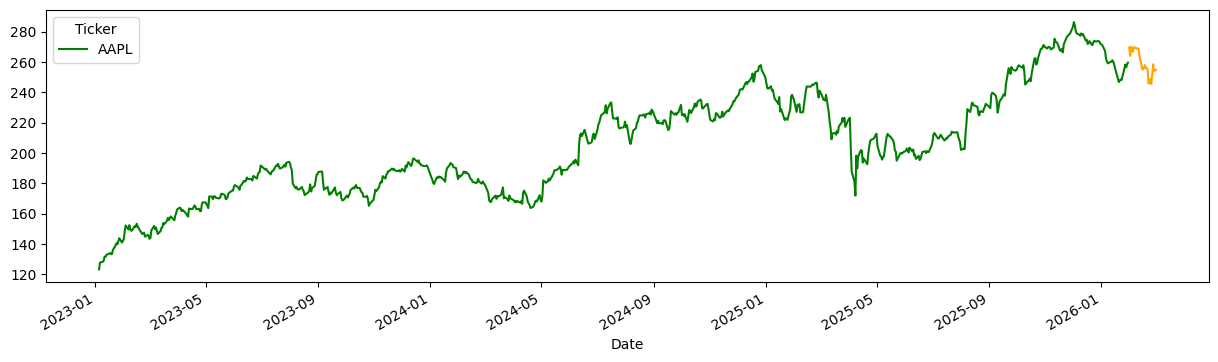

In [18]:
df_aapl['Close'].plot(figsize=(15, 4), color="green")
df_aapl['Predict'].plot(figsize=(15, 4), color="orange")
plt.show()